## Import Library

In [ ]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import cv2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import io

## Import data

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes


In [ ]:
!kaggle datasets download -d  navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
brain-mri-images-for-brain-tumor-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


### Unzip File

In [ ]:
from zipfile import ZipFile

file_name = "brain-mri-images-for-brain-tumor-detection.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


## Load Images

In [ ]:
def load_images_from_directory(direct):
    images = []
    for filename in os.listdir(direct):
        img = Image.open(os.path.join(direct,filename))
        img = img.resize((224, 224))
        img = img.convert('RGB')
        img = np.array(img) / 255.0
        images.append(img)
    return images

In [44]:
tumor_images = load_images_from_directory('/content/brain_tumor_dataset/yes')
no_tumor_images = load_images_from_directory('/content/brain_tumor_dataset/no')

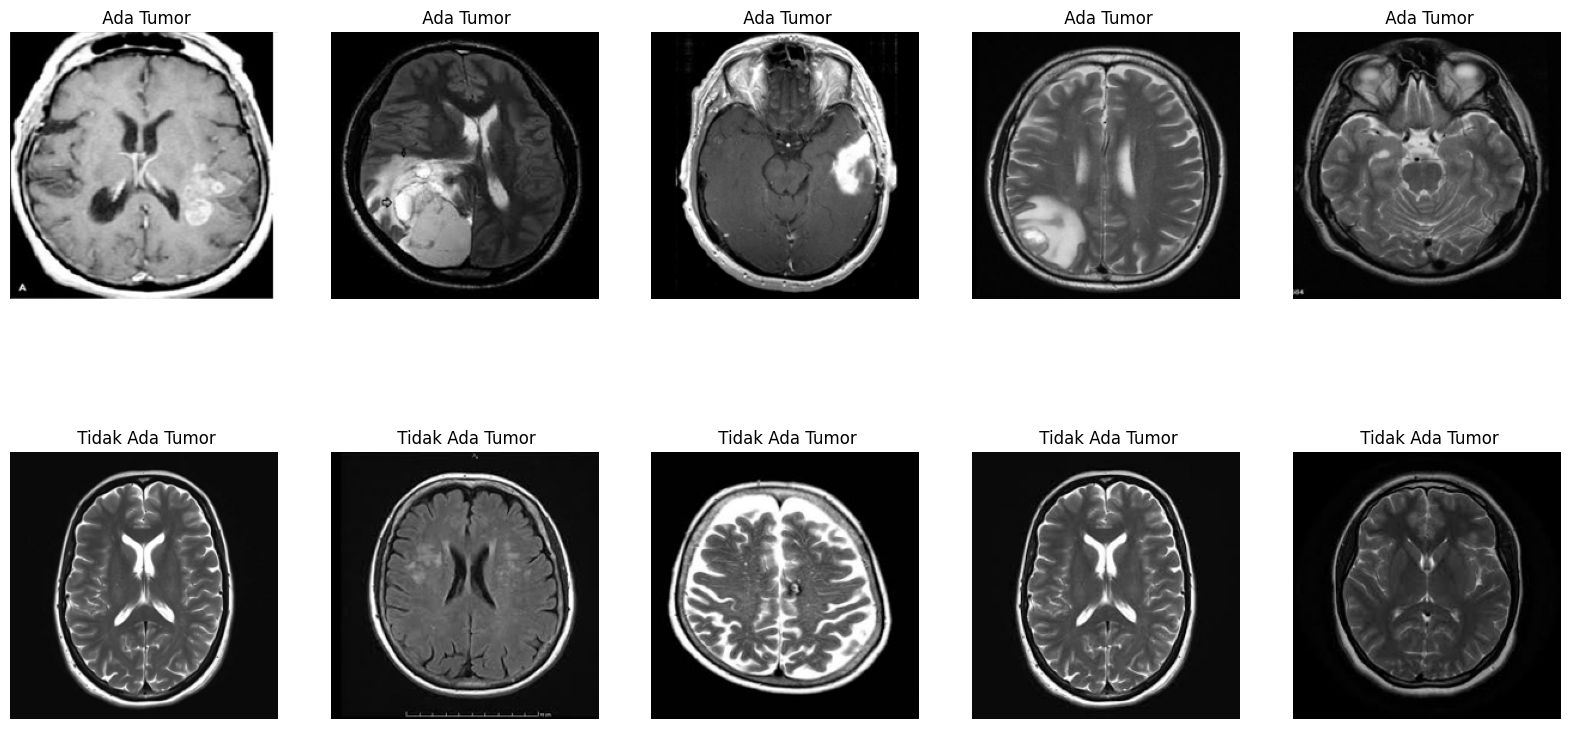

In [45]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i in range(5):
  axes[0, i].imshow(tumor_images[i])
  axes[0, i].set_title(' Ada Tumor')
  axes[0, i].axis('off')

for i in range(5):
  axes[1, i].imshow(no_tumor_images[i])
  axes[1, i].set_title(' Tidak Ada Tumor')
  axes[1, i].axis('off')

plt.show()

In [46]:
type(tumor_images)


list

In [47]:
len(tumor_images)

155

In [48]:
len(no_tumor_images)

98

In [49]:
tumor_images

[array([[[0.11764706, 0.11764706, 0.11764706],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.09411765, 0.09411765, 0.09411765],
         ...,
         [0.38039216, 0.38039216, 0.38039216],
         [0.4       , 0.4       , 0.4       ],
         [0.37647059, 0.37647059, 0.37647059]],
 
        [[0.09019608, 0.09019608, 0.09019608],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],
 
        [[0.09803922, 0.09803922, 0.09803922],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.98823529, 0.98823529, 0.98823529],
         [0.98823529, 0.98823529, 0.98823529],
         [0.98431373, 0.98431373, 0.98431373]],
 
        ...,
 
        [[0.09019608, 0.09019608, 0.09019608],
         [0.        , 0.        , 0.     

## Labeling

In [50]:
def labeling (tumor_images,no_tumor_images):
  tumor_labels = np.ones((len(tumor_images)))
  no_tumor_labels = np.zeros((len(no_tumor_images)))
  return tumor_labels, no_tumor_labels
tumor_labels, no_tumor_labels = labeling(tumor_images, no_tumor_images)

In [51]:
tumor_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [52]:
no_tumor_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [53]:
type(tumor_labels)

numpy.ndarray

In [54]:
data = tumor_images + no_tumor_images
labels = np.concatenate((tumor_labels, no_tumor_labels), axis=0)

In [55]:
data

[array([[[0.11764706, 0.11764706, 0.11764706],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.09411765, 0.09411765, 0.09411765],
         ...,
         [0.38039216, 0.38039216, 0.38039216],
         [0.4       , 0.4       , 0.4       ],
         [0.37647059, 0.37647059, 0.37647059]],
 
        [[0.09019608, 0.09019608, 0.09019608],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],
 
        [[0.09803922, 0.09803922, 0.09803922],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.98823529, 0.98823529, 0.98823529],
         [0.98823529, 0.98823529, 0.98823529],
         [0.98431373, 0.98431373, 0.98431373]],
 
        ...,
 
        [[0.09019608, 0.09019608, 0.09019608],
         [0.        , 0.        , 0.     

In [56]:
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [57]:
data[0].shape

(224, 224, 3)

## Splitting data

In [58]:
x = np.array(data)
y = np.array(labels)

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

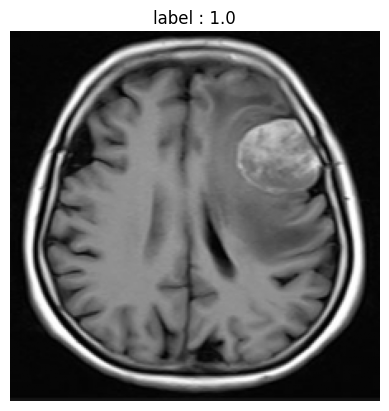

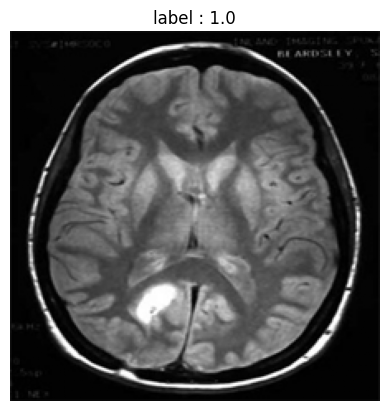

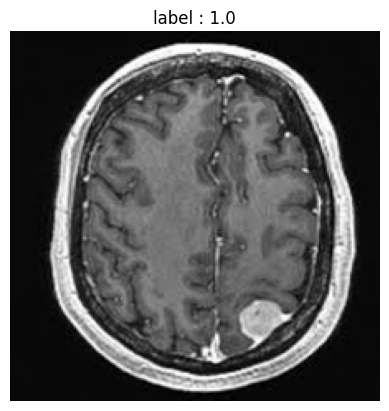

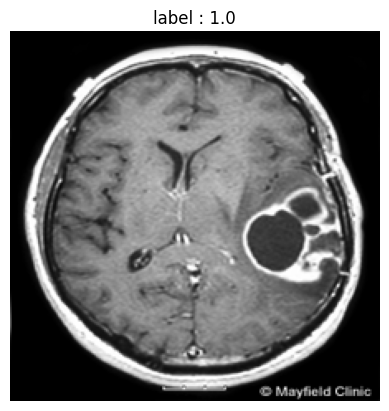

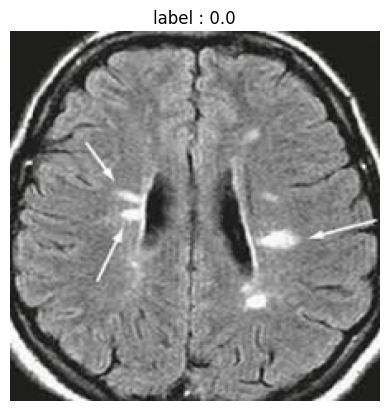

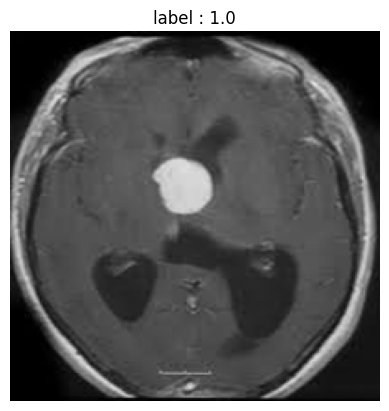

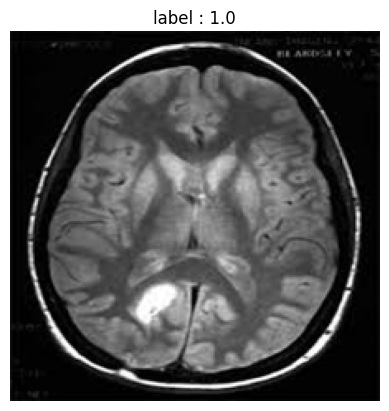

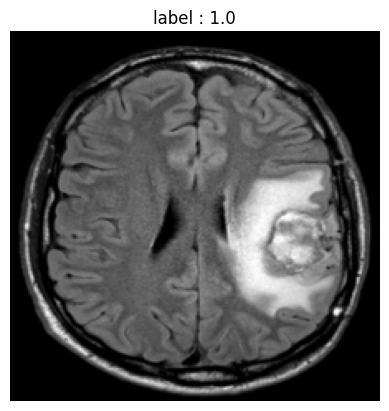

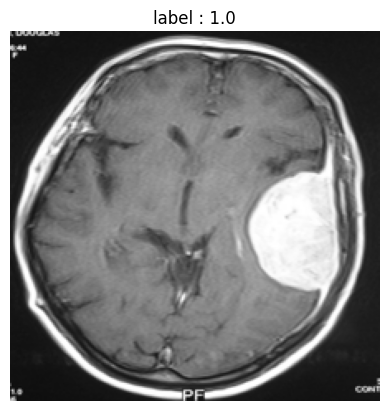

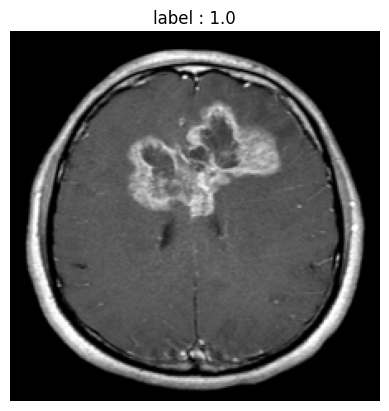

In [69]:
for image, label in train_dataset.take(10):
  plt.figure()
  plt.title('label : {}'.format(label.numpy()))
  plt.imshow(image.numpy()) # konversi tensor ke numpy
  plt.axis('off')
  plt.show()

In [70]:
validation_dataset = int(0.1*202)
train = train_dataset.skip(validation_dataset)
validation = train_dataset.take(validation_dataset)

In [71]:
batch_size = 32
train = train.batch(batch_size)
validation = validation.batch(batch_size)
test = test_dataset.batch(batch_size)

## Training Data

In [73]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 394272)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      50,466,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,467,969 (192.52 MB)

 Trainable params: 50,467,969 (192.52 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [76]:
history = model.fit(train,epochs=10,validation_data=validation)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.6268 - loss: 11.6460 - val_accuracy: 0.8500 - val_loss: 2.6959
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6841 - loss: 4.1523 - val_accuracy: 0.6500 - val_loss: 0.9488
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7049 - loss: 1.1992 - val_accuracy: 0.9500 - val_loss: 0.5905
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8473 - loss: 0.4620 - val_accuracy: 0.8500 - val_loss: 0.4551
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8637 - loss: 0.3300 - val_accuracy: 0.9000 - val_loss: 0.4021
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9214 - loss: 0.2351 - val_accuracy: 0.9000 - val_loss: 0.3760
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9157 - loss: 0.1876 - val_accuracy: 0.9500 - val_loss: 0.3576
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9432 - loss: 0.1473 - val_accuracy: 0.9000 - val_loss: 0.3583
Epoch 9

In [77]:
evaluate = model.evaluate(test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step - accuracy: 0.8433 - loss: 0.5318


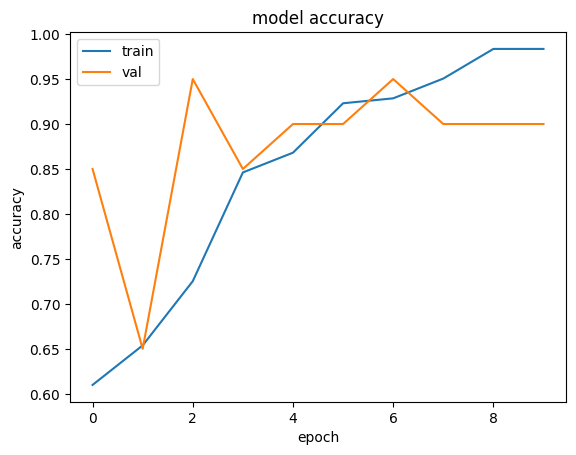

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

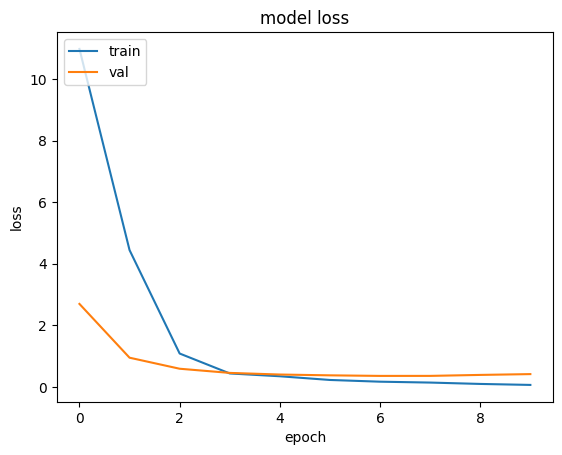

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [81]:
model.save('/content/brain_tumor_dataset/model_datatumor.h5')

## Testing Data


In [82]:
def load_uploaded_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image(image_path, model):
    img_array = load_uploaded_image(image_path)
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return 'Ada Tumor'
    else:
        return 'Tidak Ada Tumor'

Saving 44no.jpg to 44no.jpg


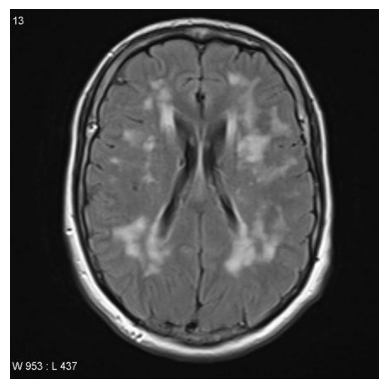

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Tidak Ada Tumor


In [85]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = Image.open(io.BytesIO(image_bytes))


plt.imshow(img)
plt.axis('off')
plt.show()

result = predict_image(file_name, model)
print(result)